In [1]:
from PIL import Image

In [1]:
#!/usr/bin/env python
"""
Definition of test problems
--------------------------------------------------------------------------
Created June 26, 2023 for TRIPs-Py library
"""
__author__ = "Mirjeta Pasha and Connor Sanderford"
__copyright__ = "Copyright 2022, TRIPs-Py library"
__license__ = "GPL"
__version__ = "0.1"
__maintainer__ = "Mirjeta Pasha"
__email__ = "mirjeta.pasha@tufts.edu; mirjeta.pasha1@gmail.com"
# import os,sys
# sys.path.insert(0,'/Users/mirjetapasha/Documents/Research_Projects/TRIPSpy/TRIPSpy')
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.linalg import fractional_matrix_power
from numpy import array, diag, dot, maximum, empty, repeat, ones, sum
from numpy.linalg import inv
from trips.operators import *
##Specify the font
##Latex needs to be installed! If not installed, please comment the following 5 lines
# parameters = {'xtick.labelsize': 12, 'ytick.labelsize': 12,
#           'axes.titlesize': 18, 'axes.labelsize': 18, 'figure.titlesize': 14, 'legend.fontsize': 13}
# plt.rcParams.update(parameters)
import time
import numpy as np
import scipy as sp
import scipy.stats as sps
import scipy.io as spio
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import astra
# import phantoms as phantom
from venv import create
import pylops
from scipy.ndimage import convolve
from scipy import sparse
from scipy.ndimage import convolve
import scipy.special as spe
from trips.testProblems import *
from trips.operators import *
from trips.solvers.gks import *
from trips.solvers.Tikhonov import *
from trips.solvers.tSVD import *
from trips.solvers.ArnoldiTikhonov import *

In [73]:
# Deblurring example test problem
Deblur = Deblurring()
# In the class Deblurring we have can define the type of problem to be used.
generate_matrix = 'False' #Defines a blurring operator where the forward operator matrix is formed explicitly
imagesize_x = 128 # Define the first dimension of the image
imagesize_y = 128 # Defines the second dimension of the image
spread = 1.5 # The PSF parameter
choose_image = 'satellite128' #The choice of the image
shape = (imagesize_x, imagesize_y)
x_true, nx, ny = Deblur.generate_true(choose_image)
# if generate_matrix == 'True':
#         # spread = [2,2]
#         size = imagesize_x
#         spreadnew = (spread, spread)
#         A = Deblur.forward_Op_matrix(spreadnew, shape, imagesize_x, imagesize_y)
# else:
#         A = Deblur.forward_Op([11,11], 0.5, imagesize_x, imagesize_y)
# b_true = Deblur.generate_data(x_true, generate_matrix)
# (b, delta) = Deblur.add_noise(b_true, 'Gaussian', noise_level = 0.01)
# Deblur.plot_rec(x_true.reshape((shape), order = 'F'), save_imgs = False, save_path='./saveImagesDeblurring'+'rec'+choose_image)

In [4]:
import scipy.io as spio
path_package = '/Users/mirjetapasha/Documents/Research_Projects/TRIPS_June25/multiparameter_package'
dataa = spio.loadmat(path_package + '/demos/data/images/hubble.mat')

In [3]:
old_size = [nx, ny]

In [85]:
import matplotlib.pyplot as plt
def check_imagesize_toreshape(existingimage, chooseimage, old_size, newsize):
    path_package = '/Users/mirjetapasha/Documents/Research_Projects/TRIPS_June25/multiparameter_package'
    if (old_size[0] != newsize[0] or old_size[1] != newsize[1]):
        Deblur.plot_rec(existingimage.reshape((shape), order = 'F'), save_imgs = False)
        temp_im = Image.open(path_package + '/demos/data/images/'+chooseimage+'_'+str(newsize[0])+'.jpg')
        image_new =  np.array(temp_im.resize((newsize[0], newsize[1])))
        spio.savemat(path_package + '/demos/data/images/'+choose_image+'_'+str(newsize[0])+'.mat', mdict={'x_true': image_new})
    return image_new

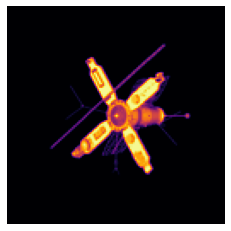

<Figure size 432x288 with 0 Axes>

In [86]:
newsize = [300, 300]
new_im = check_imagesize_toreshape(x_true, choose_image, old_size, newsize)

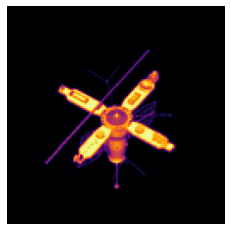

In [60]:
import matplotlib.pyplot as plt
plt.imshow(x_true.reshape((128, 128)))
plt.axis('off')
path_package = '/Users/mirjetapasha/Documents/Research_Projects/TRIPS_June25/multiparameter_package'
# plt.imsave(path_package + '/demos/data/images/hubble', bb, format="jpg", cmap="hot")
plt.savefig(path_package + '/demos/data/images/hubble'+'.jpg',bbox_inches='tight', pad_inches = 0)

In [61]:
image = Image.open(path_package + '/demos/data/images/hubble.jpg')

In [62]:
hubble_new = image.resize((400, 400))

In [69]:
dd = np.array(hubble_new)
dd

array([[[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       ...,

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]],

       [[0, 0, 2],
        [0, 0, 2],
        [0, 0, 2],
        ...,
        [0, 0, 2],
        [0, 0, 2],
        [0, 0, 2]]], dtype=uint8)

In [75]:
spio.savemat(path_package + '/demos/data/images/'+choose_image+'_'+str(newsize[0])+'.mat', mdict={'x_true':dd})